#Ecobici

David Alberto Padrón Sánchez A01663806

In [81]:
import pandas as pd
import numpy as np
import requests
import matplotlib as plt
import seaborn as sns

url ="https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/02/2025-01.csv"
local_filename = '2025-01.csv'
df = pd.read_csv(local_filename)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809775 entries, 0 to 1809774
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   int64  
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha_Arribo           object 
 8   Hora_Arribo            object 
dtypes: float64(1), int64(1), object(7)
memory usage: 124.3+ MB


In [83]:
df["retiro"] = pd.to_datetime(df["Fecha_Retiro"] + " " + df["Hora_Retiro"], errors="coerce")
df["arribo"] = pd.to_datetime(df["Fecha_Arribo"] + " " + df["Hora_Arribo"], errors="coerce")
df[["retiro","arribo"]].head()


/tmp/ipython-input-3462712738.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["retiro"] = pd.to_datetime(df["Fecha_Retiro"] + " " + df["Hora_Retiro"], errors="coerce")


,retiro,arribo
0,2024-12-31 23:57:02,2025-01-01 00:00:03
1,2024-12-31 23:51:40,2025-01-01 00:00:41
2,2024-12-31 23:48:36,2025-01-01 00:00:59
3,2024-12-31 23:54:11,2025-01-01 00:01:08
4,2024-12-31 23:35:28,2025-01-01 00:01:17


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809775 entries, 0 to 1809774
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Genero_Usuario         object        
 1   Edad_Usuario           float64       
 2   Bici                   int64         
 3   Ciclo_Estacion_Retiro  object        
 4   Fecha_Retiro           object        
 5   Hora_Retiro            object        
 6   Ciclo_EstacionArribo   object        
 7   Fecha_Arribo           object        
 8   Hora_Arribo            object        
 9   retiro                 datetime64[ns]
 10  arribo                 datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 151.9+ MB


In [85]:
df["duracion_min"] = (df["arribo"] - df["retiro"]).dt.total_seconds() / 60
df["duracion_min"].describe()

,duracion_min
count,578254.000000
mean,251973.486976
std,130705.285334
min,1.100000
25%,125321.900000
50%,252020.558333
75%,338431.566667
max,468731.366667


Elimino los viajes negativos, no tiene sentido tenerlos

In [86]:
df = df[(df["duracion_min"] > 0) & (df["duracion_min"] < 1440)]
print("Shape después de limpieza:", df.shape)
df.head()


Shape después de limpieza: (16677, 12)


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,retiro,arribo,duracion_min
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,3.016667
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,9.016667
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,12.383333
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,6.950000
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,25.816667


In [87]:
df = df.drop(columns=["Fecha_Retiro","Hora_Retiro","Fecha_Arribo","Hora_Arribo"])
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,retiro,arribo,duracion_min
0,M,26.0,5180930,568,572,2024-12-31 23:57:02,2025-01-01 00:00:03,3.016667
1,F,54.0,3653953,283,596,2024-12-31 23:51:40,2025-01-01 00:00:41,9.016667
2,M,38.0,7511322,034,064,2024-12-31 23:48:36,2025-01-01 00:00:59,12.383333
3,M,41.0,3804572,258,023,2024-12-31 23:54:11,2025-01-01 00:01:08,6.950000
4,M,35.0,3848405,043,126,2024-12-31 23:35:28,2025-01-01 00:01:17,25.816667


In [88]:
df.isnull().sum()

,0
Genero_Usuario,0
Edad_Usuario,2
Bici,0
Ciclo_Estacion_Retiro,0
Ciclo_EstacionArribo,0
retiro,0
arribo,0
duracion_min,0


In [89]:
df["Edad_Usuario"] = df["Edad_Usuario"].fillna(df["Edad_Usuario"].median())
df.isnull().sum()

,0
Genero_Usuario,0
Edad_Usuario,0
Bici,0
Ciclo_Estacion_Retiro,0
Ciclo_EstacionArribo,0
retiro,0
arribo,0
duracion_min,0


Nuestros valores ya no tienen nulos

In [90]:
df = df[(df["duracion_min"] > 0) & (df["duracion_min"] < 1440)]


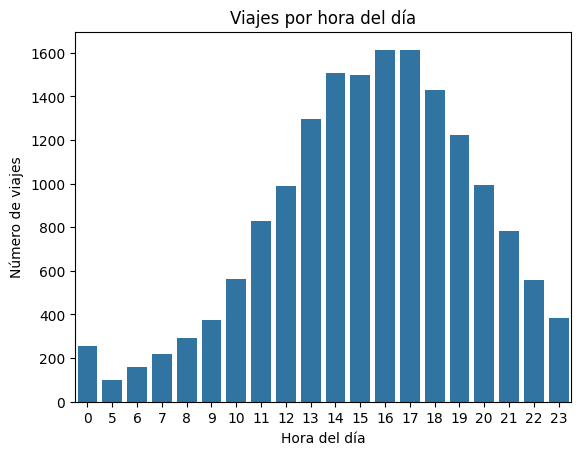

In [91]:
import matplotlib.pyplot as pyplt

df["hora"] = df["retiro"].dt.hour

sns.countplot(x="hora", data=df)
pyplt.title("Viajes por hora del día")
pyplt.xlabel("Hora del día")
pyplt.ylabel("Número de viajes")
pyplt.show()

Se usan más las bicis en la tarde

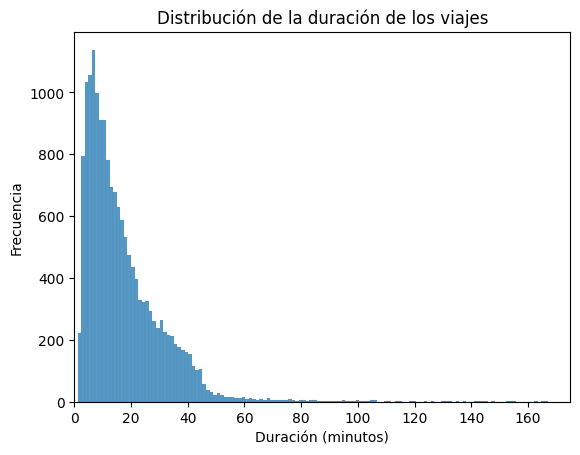

Duración promedio en minutos: 17.890752733305348
Duración mediana en minutos: 13.35


In [92]:
sns.histplot(df["duracion_min"])
pyplt.title("Distribución de la duración de los viajes")
pyplt.xlabel("Duración (minutos)")
pyplt.ylabel("Frecuencia")
pyplt.xlim(0, 175)
pyplt.show()

print("Duración promedio en minutos:", df["duracion_min"].mean())
print("Duración mediana en minutos:", df["duracion_min"].median())

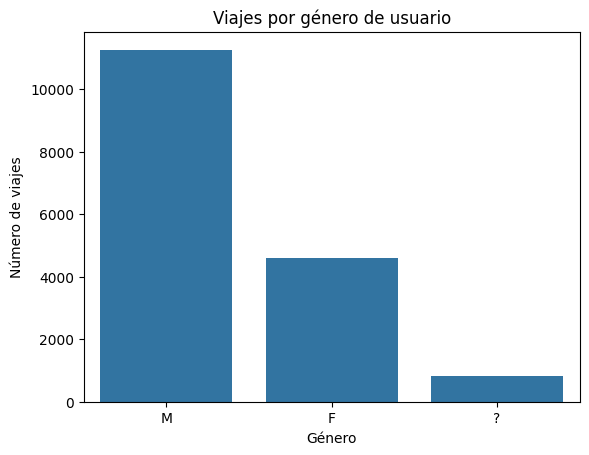


Porcentaje de Viajes por género de usuario (%):


,proportion
Genero_Usuario,
M,67.530131
F,27.552917
?,4.916951


In [93]:
df['Genero_Usuario'] = df['Genero_Usuario'].replace('O', '?')
sns.countplot(x="Genero_Usuario", data=df)
pyplt.title("Viajes por género de usuario")
pyplt.xlabel("Género")
pyplt.ylabel("Número de viajes")
pyplt.show()
print("\nPorcentaje de Viajes por género de usuario (%):")
df["Genero_Usuario"].value_counts(normalize=True) * 100

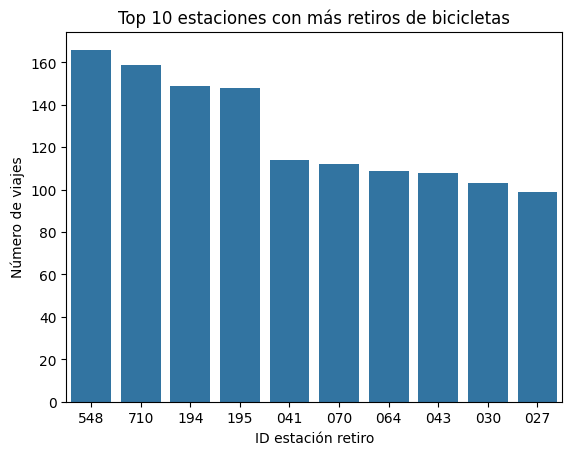


Cantidad de retiros de bicicletas por estación (Top 10):


,count
Ciclo_Estacion_Retiro,
548,166
710,159
194,149
195,148
041,114
070,112
064,109
043,108
030,103


In [94]:
top_estaciones = df["Ciclo_Estacion_Retiro"].value_counts().head(10)
sns.barplot(x=top_estaciones.index, y=top_estaciones.values)
pyplt.title("Top 10 estaciones con más retiros de bicicletas")
pyplt.xlabel("ID estación retiro")
pyplt.ylabel("Número de viajes")
pyplt.show()
print("\nCantidad de retiros de bicicletas por estación (Top 10):")
top_estaciones

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df_modelo = df.copy()
le = LabelEncoder()
df_modelo["Genero_Usuario"] = le.fit_transform(df_modelo["Genero_Usuario"])
X = df_modelo[["Edad_Usuario", "hora", "Genero_Usuario"]]
y = df_modelo["duracion_min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE:{rmse: .2f}")
print("R2:", r2)

MAE: 11.19
RMSE: 30.55
R2: 0.0006799430408727103


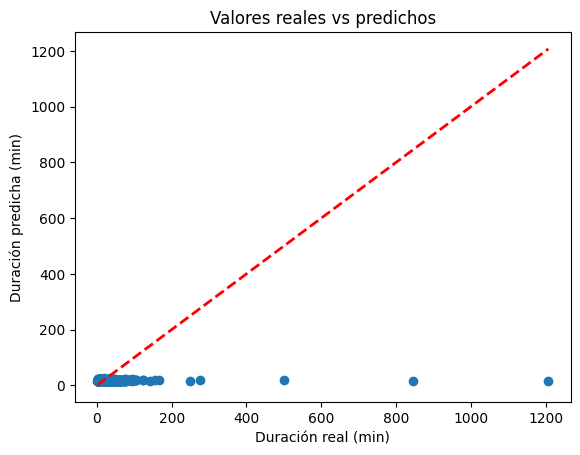

In [96]:
pyplt.scatter(y_test, y_pred)
pyplt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--', lw=2)
pyplt.xlabel("Duración real (min)")
pyplt.ylabel("Duración predicha (min)")
pyplt.title("Valores reales vs predichos")
pyplt.show()